# **Linear Regression on Moore's Dataset using ANN**

Contributed by Sayak Bhattacharya

Github [GDSC TMSL ML WORKSHOP 2023](https://github.com/GDSC-TMSL/ML-Study-Jams-2023/tree/main/ML_Study_Jam/ANN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#We will verify Moore's Law using Linear Regression

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
#Getting the data for the regression model
from google.colab import files
uploaded = files.upload()

In [ ]:
!ls

moore.csv  sample_data


In [ ]:
data = pd.read_csv('moore.csv',header=None)

In [ ]:
data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [ ]:
## Counting no.of null values in entire dataframe
data.isna().sum().sum()

0

In [ ]:
# Removing all null values from dataframe if any
data = data.dropna(axis=0)

In [ ]:
data.info()
data.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       162 non-null    int64
 1   1       162 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


0

In [ ]:
X = data.values[:,0].reshape(-1,1)
Y = data.values[:,1]

In [ ]:
X.size,Y.size

(162, 162)

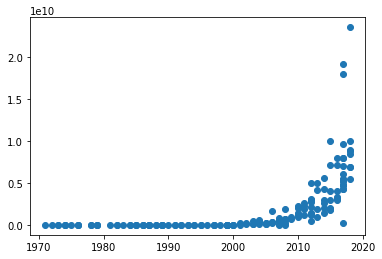

In [ ]:
plt.scatter(X,Y)

##**Since we want a linear model, we have to convert this exponential graph into a linear scale.**

* *We can do that by applying logarithmic function to it!*



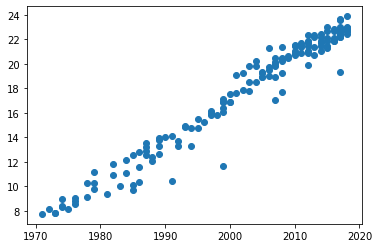

In [ ]:
Y = np.log(Y)
plt.scatter(X,Y)

###**Since the X values range very widely, we need to shrink them down to a lower range for better processing**

In [ ]:
X = X - X.mean()

In [ ]:
# Now we will create our tensorflow model for Linear Regression

model = keras.models.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(1)
])


In [ ]:
# We define a Stochastic Gradient Descent optimizer with 0.001 learning rate and 0.9 momentum
model.compile(optimizer = keras.optimizers.SGD(0.001, 0.9), 
              loss = 'mse')


In [ ]:
#learning rate scheduler

def schedule(epoch, lr):    #Slowing down the learning rate after 50 epochs
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
#Training the model
r = model.fit(X, Y, epochs=200, verbose = 1,callbacks= [scheduler])

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 0.8887 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9085 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8926 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8775 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 0.8891 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8925 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.9041 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 1.5720 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 1.5106 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 1.3069 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 1.4151 - lr: 0.00

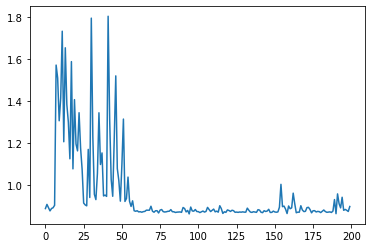

In [ ]:
#Plotting the loss
plt.plot(r.history['loss'], label='loss')

In [ ]:
model.evaluate(X,Y)

6/6 [==============================] - 0s 2ms/step - loss: 0.8965


0.8964970707893372

In [ ]:
model.save('LinearClassification.h5')

# **To load a model**

* model = tf.keras.models.load_model('ModelName')
* print(model.layers)
* model.evaluate(X,Y)